<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/bifurcaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Teoría de Bifurcaciones

Nombre: Biología de Sistemas

Fecha: enero 2021

Si el comportamiento de un sistema dinámico cambia repentinamente a medida que se varía un parámetro, se dice que ha sufrido una bifurcación. En un punto de bifurcación, se puede ganar o perder estabilidad.

Es posible que un sistema no lineal tenga más de una solución de estado estable. Diferentes condiciones iniciales pueden conducir a diferentes soluciones estables. Un istema de esta forma se dice que es multiestable. Mediante la introducción de un mecanismo de *feedback* al sistema es posible obtener histeresis, o un comportamieto biestable. 

# Bifurcación Silla-Nodo 

La bifurcación del nodo silla de montar es el mecanismo básico mediante el cual se crean y destruyen los puntos fijos. A medida que se varía un parámetro, dos puntos fijos se mueven uno hacia el otro, chocan y se aniquilan mutuamente.

El ejemplo prototípico de una bifurcación de nodo silla viene dado por el sistema de primer orden

$$\dot{x} = r + x^2$$

donde $r$ es un parámetro, que puede ser positivo, negativo o cero. Cuando $r$ es negativo, hay dos puntos fijos, uno estable y otro inestable. A medida que $r$ se acerca a $0$ desde abajo, la parábola se mueve hacia arriba y los dos puntos fijos se acercan. Cuando $r = 0$, los puntos fijos se fusionan en un punto fijo medio estable en $x^*$ = 0. Este tipo de punto fijo es extremadamente delicado: desaparece tan pronto como $ r > 0$, y ahora no hay puntos fijos en absoluto. Decimos que se produjo una bifurcación en $r = 0$, ya que los campos vectoriales para $r < 0$ y $r> 0$ son cualitativamente diferentes.

Cargar librerías

In [74]:
install.packages("deSolve")
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



grind.R was sourced


In [75]:
# modelo con bifurcacion tipo silla-nodo
model <- function(times,state,parms) {
        with(as.list(c(parms,state)), {
                
                dx = r+x^2
                dy = -y
                return(list(c(dx,dy)))
        })
}

In [76]:
# parámetros del modelo 
p <- c(r = - 0.1)

In [77]:
# condiciones iniciales
s <- c(x = 0.1, y = 1)

No convergence: start closer to a steady statediagonal element is zero 
[1] 1
No convergence: start closer to a steady state

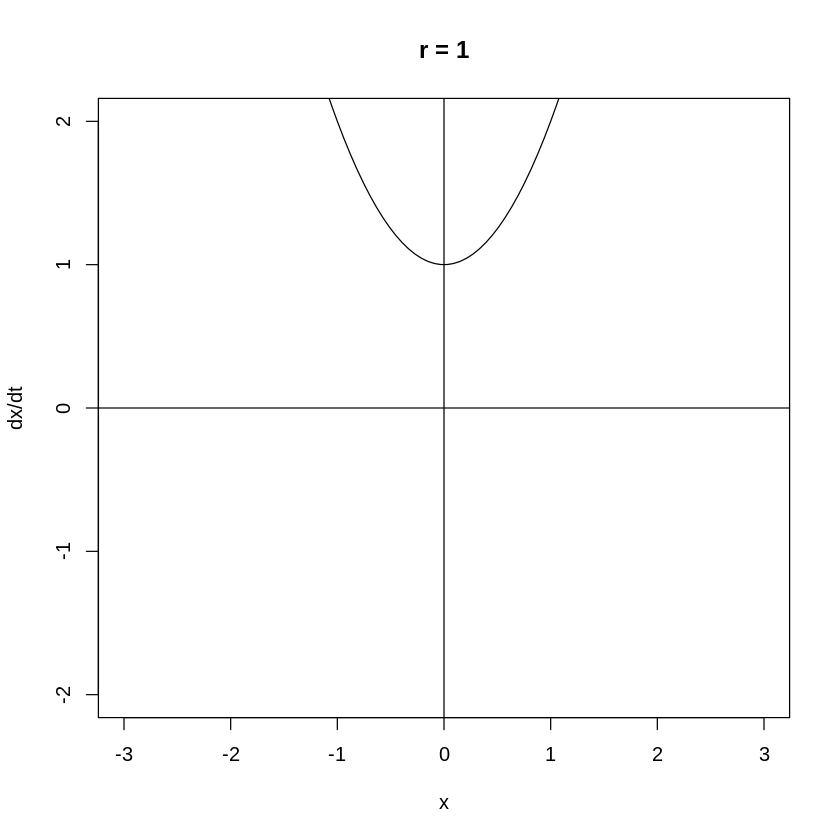

            x             y 
-6.103016e-05  0.000000e+00 
Stable point, eigenvalues:  -0.0001220503 -1 
           x            y 
6.104016e-05 0.000000e+00 
Unstable point, eigenvalues:  0.0001220903 -1 


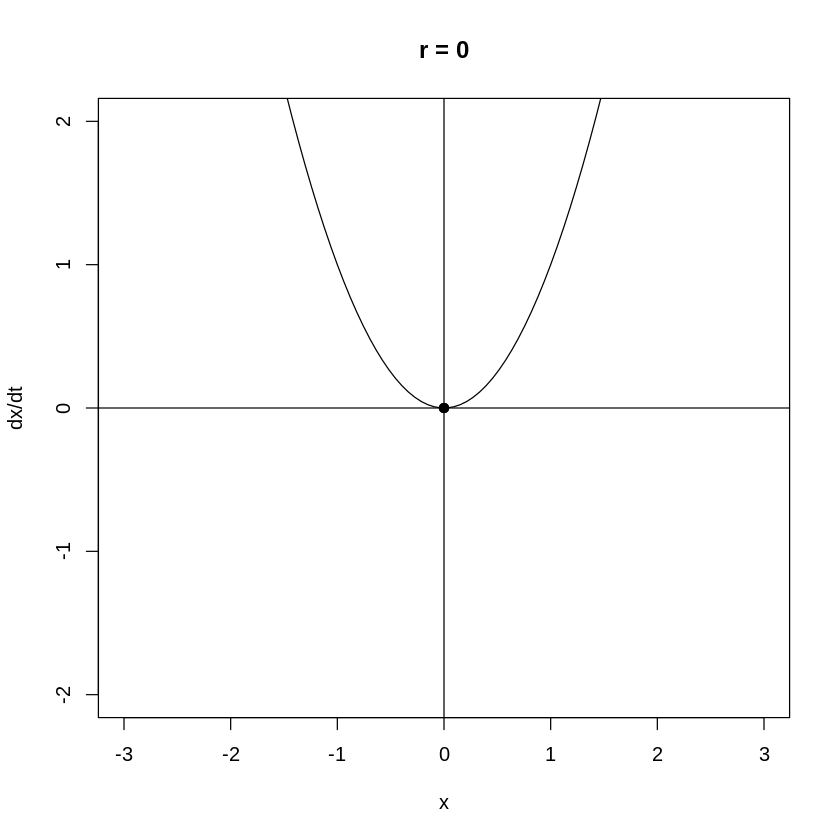

 x  y 
-1  0 
Stable point, eigenvalues:  -1 -2 
x y 
1 0 
Unstable point, eigenvalues:  2 -1 


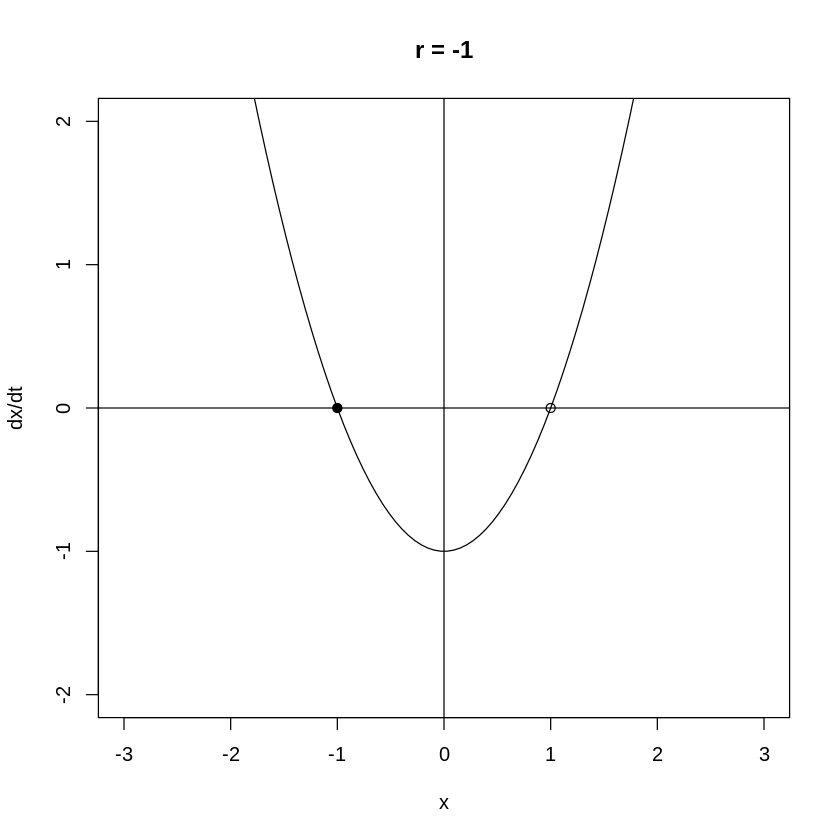

In [78]:
# Los dos estados estables de aniquilan entre si 
dxdt <- function(r) {
        f <-r + x^2
        return(f)
}

x <- seq(-3,3,len=100)

for (r in c(1,0,-1)) {
        plot(x,dxdt(r), ylim = c(-2,2), type = "l", main = paste0("r = ",r), ylab = "dx/dt")
        abline(h = 0)
        abline(v = 0)
        p["r"] <- r
        newton(state = c(x=-1,y=0), plot = TRUE)
        newton(state = c(x=1,y=0), plot = TRUE)
}

### Plano de fase 

x             y 
-1.000000e+00 -1.106627e-33

 x  y 
-1  0 
Stable point, eigenvalues:  -1 -2 
x y 
1 0 
Unstable point, eigenvalues:  2 -1 


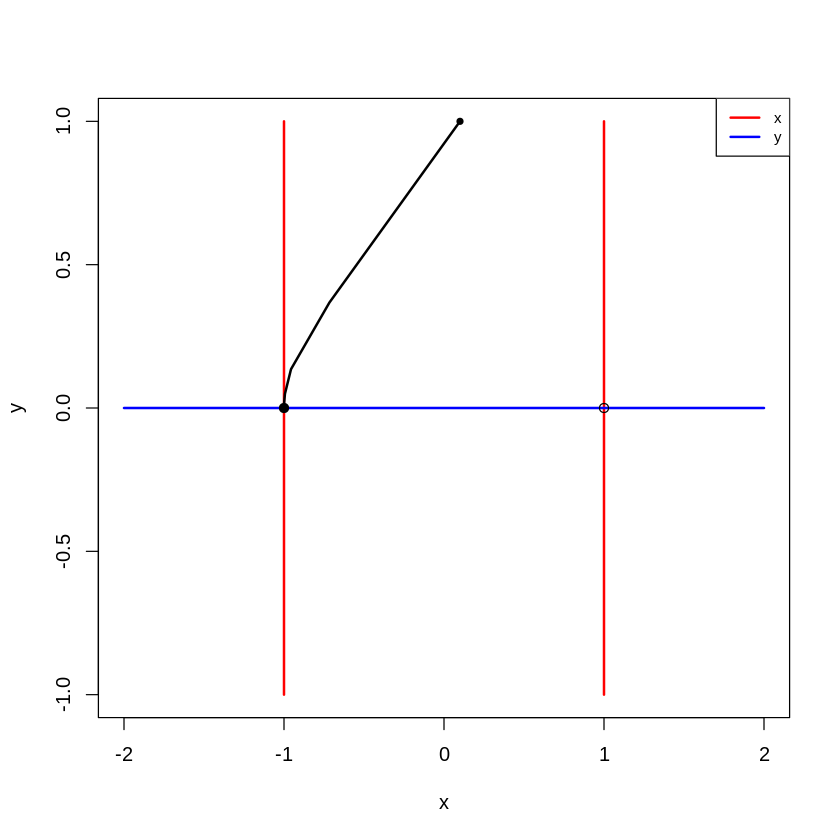

In [79]:
plane(xmin = - 2,xmax = 2,ymin = - 1, ymax = 1)
run(traject = T)

ss1 <- newton(state = c(x = -1,y = 0), plot = T)
ss2 <- newton(state = c(x = 1,y = 0), plot = T)

### Diagrama de bifurcación 

Starting at r = -1 with:
 x  y 
-1  0 
Final point at r = -0.00078125 
If this looks wrong try changing the step size
Starting at r = -1 with:
x y 
1 0 
Final point at r = -0.00078125 
If this looks wrong try changing the step size


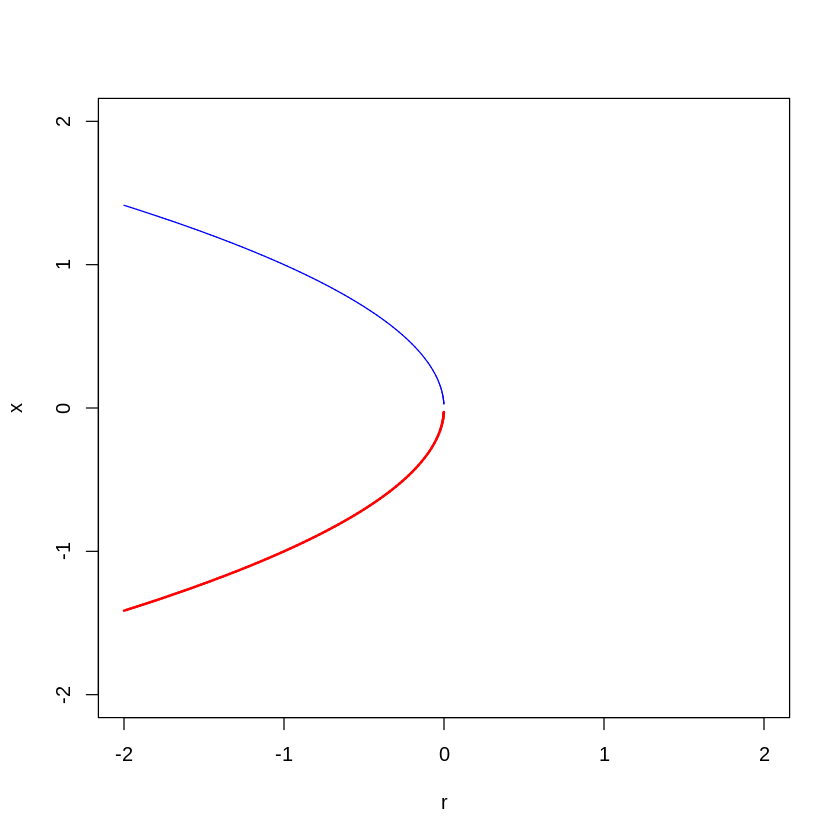

In [80]:
continue(state = ss1,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2)

continue(state = ss2,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2,
         add = T)

Tenga en cuenta que los puntos críticos satisfacen la ecuación $r = - x^2$, de ahí la forma parabólica de la curva de bifurcación

# Bifurcación transcrítica

Hay ciertas situaciones científicas en las que debe existir un punto fijo para todos los valores
de un parámetro y nunca se puede destruir. Por ejemplo, en la ecuación logística
y otros modelos simples para el crecimiento de una sola especie, hay un punto fijo en
población cero, independientemente del valor de la tasa de crecimiento. Sin embargo, tal punto fijo
puede cambiar su estabilidad a medida que se varía el parámetro. La bifurcación transcrítica es el mecanismo estándar para tales cambios en la estabilidad.

La forma normal de una bifurcación transcrítica es:

$$ \frac {dx}{dt} = rx - x^2 $$

In [81]:
model <- function(times,state,parms) {
        with(as.list(c(parms,state)), {
                
                dx = r*x - x^2
                dy = -y
                return(list(c(dx,dy)))
        })
}

x y 
0 0 
Unstable point, eigenvalues:  1 -1 
x y 
1 0 
Stable point, eigenvalues:  -1 -1 


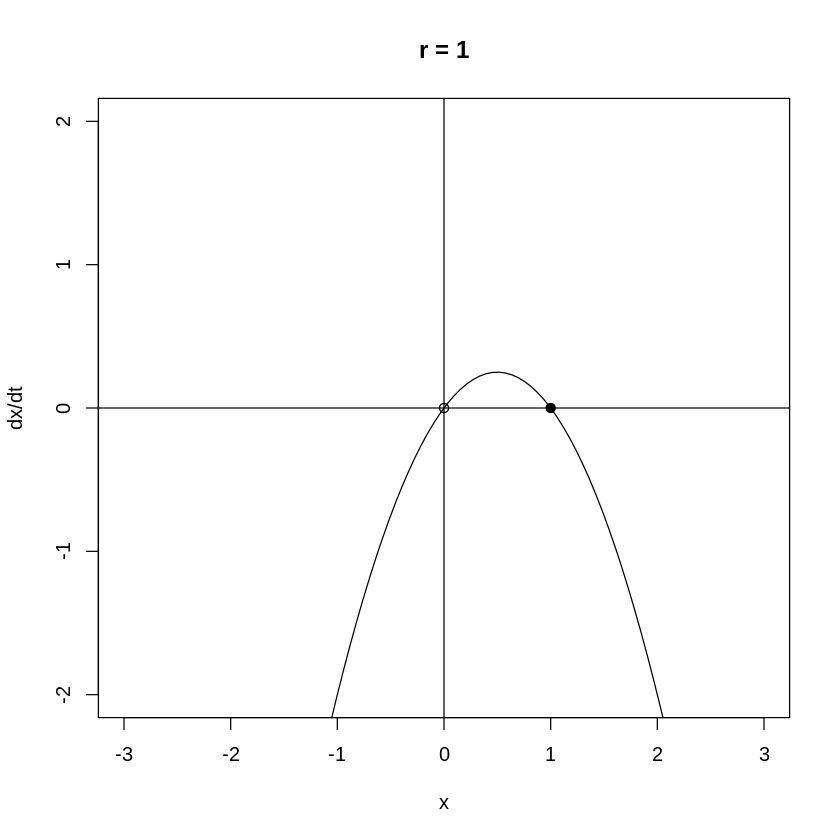

            x             y 
-6.103016e-05  0.000000e+00 
Unstable point, eigenvalues:  0.0001220503 -1 
           x            y 
6.104016e-05 0.000000e+00 
Stable point, eigenvalues:  -0.0001220903 -1 


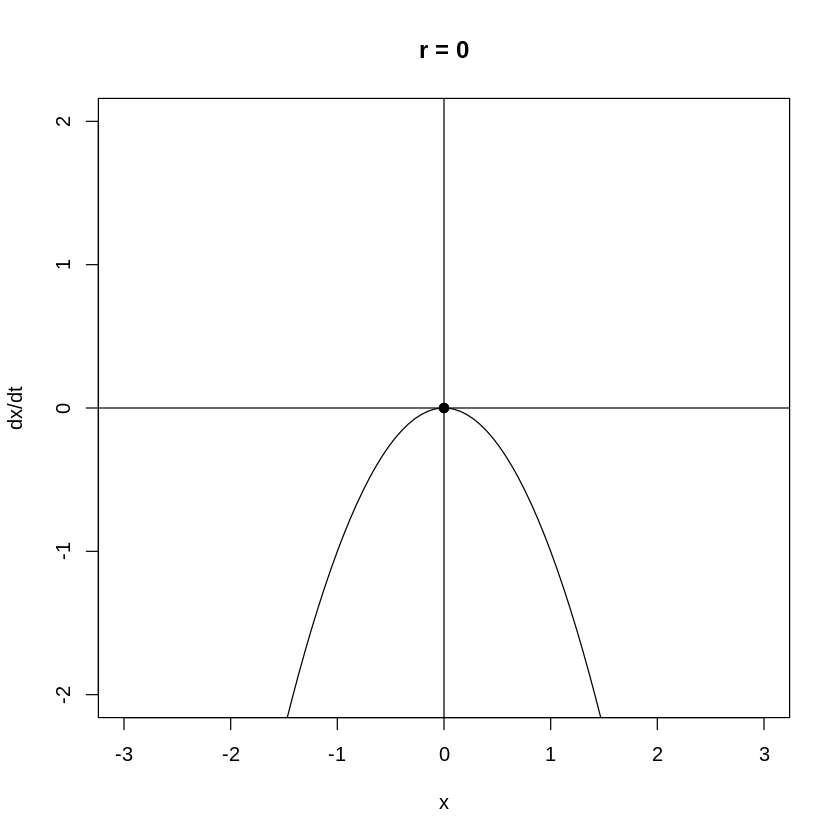

 x  y 
-1  0 
Unstable point, eigenvalues:  1 -1 
x y 
0 0 
Stable point, eigenvalues:  -1 -1 


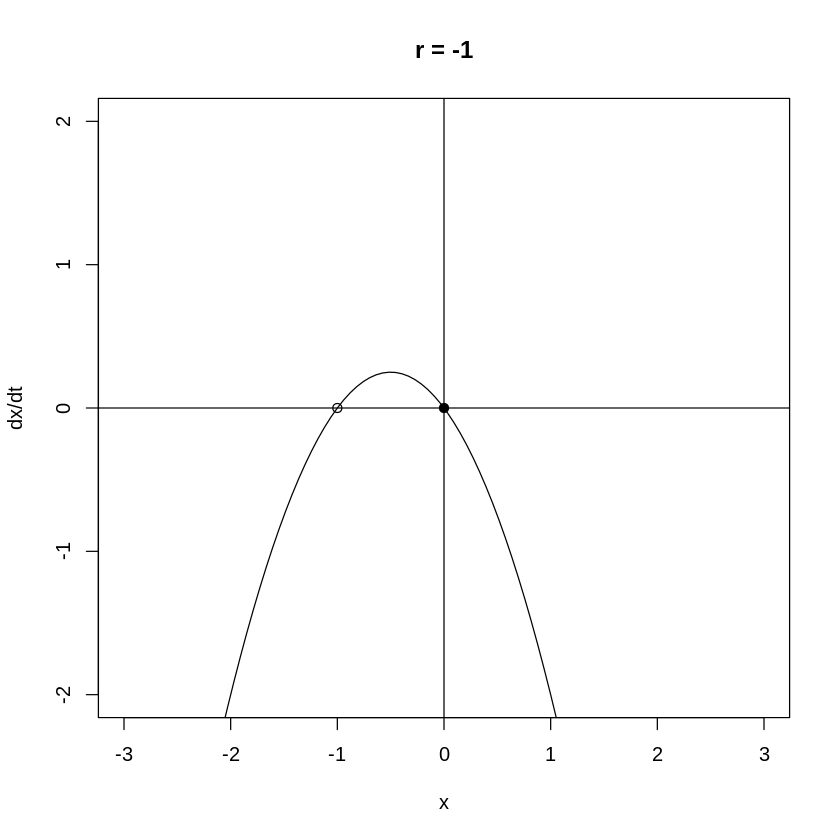

In [82]:
# dos puntos críticos cambian su estabilidad

dxdt <- function(r) {
        
        f <- r*x - x^2
        return(f)
}

x <- seq(-3,3,len=100)

for (r in c(1,0,-1)) {
        plot(x,dxdt(r), ylim = c(-2,2), type = "l", main = paste0("r = ",r), ylab = "dx/dt")
        abline(h = 0)
        abline(v = 0)
        p["r"] <- r
        newton(state = c(x=-1,y=0), plot = TRUE)
        newton(state = c(x=1,y=0), plot = TRUE)
}

Para $r < 0$, hay un punto fijo inestable en $x^* = r$ y un punto fijo estable en $x^* = 0$. A medida que aumenta $r$, el punto fijo inestable se acerca al origen y se fusiona con él cuando $r = 0$. Finalmente, cuando $r > 0$, el origen se vuelve inestable y $x^* = r$ ahora es estable. Algunas personas dicen que se ha producido un intercambio de estabilidades entre los dos puntos fijos.

En el caso transcrítico, los dos puntos fijos no desaparecen después de la bifurcación, sino que simplemente cambian su estabilidad.

In [83]:
# parámetros del modelo 
p <- c(r = 0.5)

In [84]:
# condiciones iniciales 
s <- c(x=0.1, y = 0.2)

### Plano de fase

x             y 
 5.000000e-01 -3.079933e-30

x y 
0 0 
Unstable point, eigenvalues:  0.5 -1 
  x   y 
0.5 0.0 
Stable point, eigenvalues:  -0.5 -1 


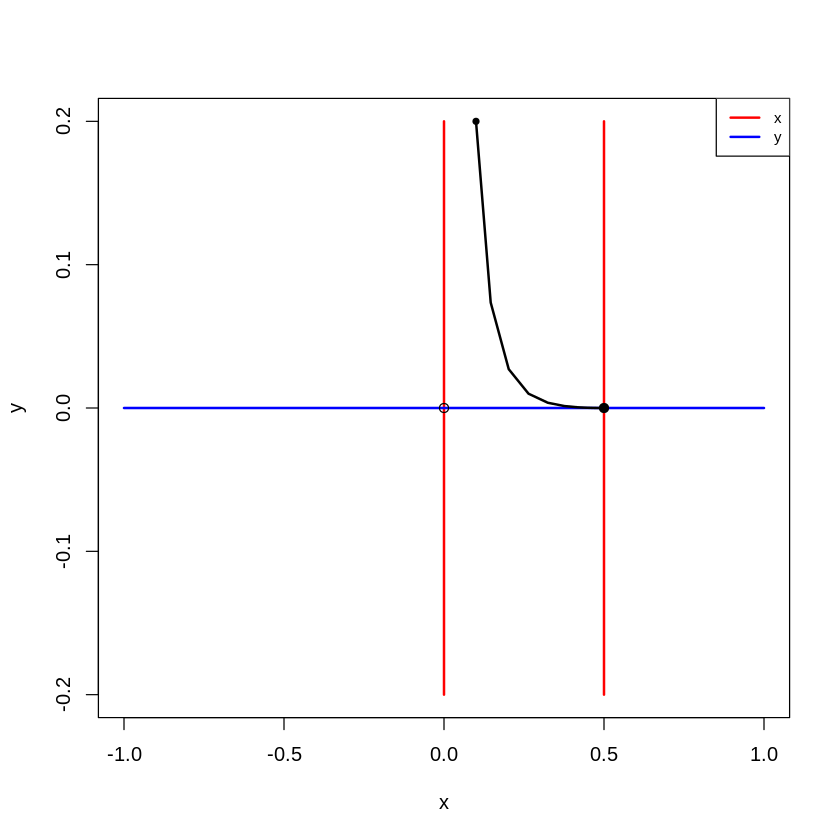

In [85]:
plane(xmin = -1,xmax = 1,ymin = -0.2, ymax = 0.2, vector = F, portrait = F)
run(traject = T)
ss1 <- newton(state = c(x=-1,y=0), plot = T)
ss2 <- newton(state = c(x=1,y=0), plot = T)

### Diagrama de bifurcación 

Starting at r = 0.5 with:
x y 
0 0 
Bifurcation at r = -1.734723e-16 
Starting at r = 0.5 with:
  x   y 
0.5 0.0 
Turning point point at r = 0.00140625 
Final point at r = 0.00859375 
If this looks wrong try changing the step size
Starting at r = -0.5 with:
   x    y 
-0.5  0.0 
Turning point point at r = -0.00140625 
Final point at r = -0.00859375 
If this looks wrong try changing the step size


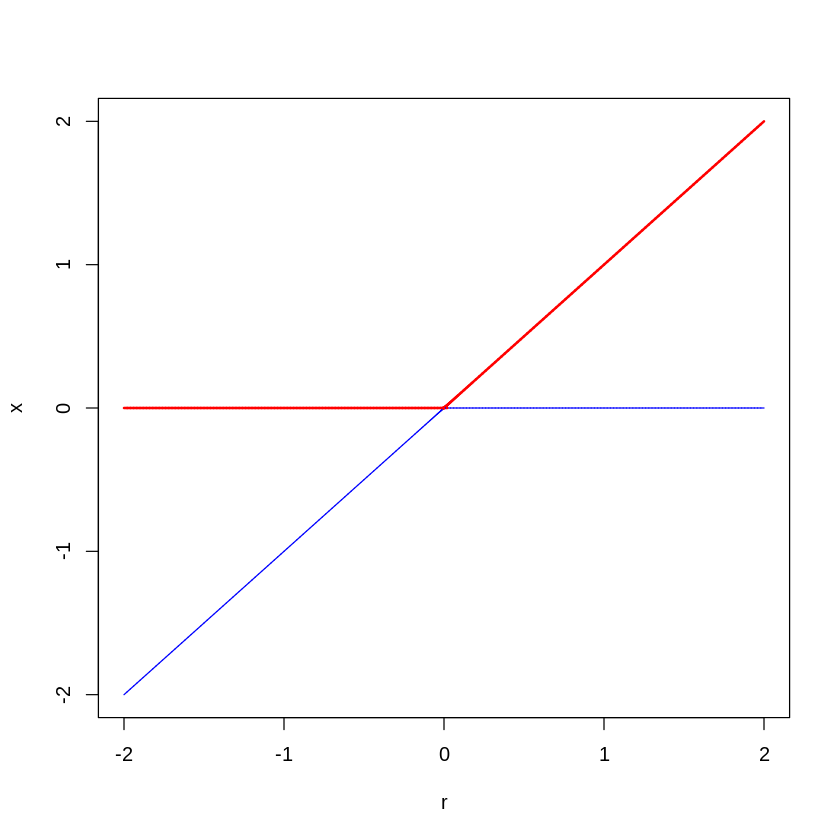

In [86]:
p["r"] <- 0.5
continue(state = ss1, x = "r", step = 0.01, xmin = -2, xmax = 2, y = "x", ymin = -2, ymax = 2)
continue(state = ss2, x = "r",step = 0.01,xmin = -2, xmax = 2,y = "x",ymin = -2,ymax = 2,add = T)
p["r"] <- -0.5
continue(state = c(x=-1,y=0),x = "r",step = 0.01,xmin = -2,xmax = 2,y = "x",ymin = -2,ymax = 2,add = T)

# Bifurcación de horquilla

Pasamos ahora a un tercer tipo de bifurcación, la llamada bifurcación en horquilla. Esta bifurcación es común en problemas físicos que tienen simetría. Por ejemplo, muchos problemas tienen una simetría espacial entre la izquierda y la derecha. En tales casos, los puntos fijos tienden a aparecer y desaparecer en pares simétricos. En el ejemplo de pandeo de la Fig. 1, la viga es estable en posición vertical si la carga es pequeña. En este caso hay un punto fijo estable que corresponde a una deflexión cero. Pero si la carga excede el umbral de pandeo, la viga puede doblarse hacia la izquierda o hacia la derecha. La posición vertical se ha vuelto inestable y han nacido dos nuevos puntos fijos simétricos, correspondientes a configuraciones de pandeo a la izquierda y a la derecha.

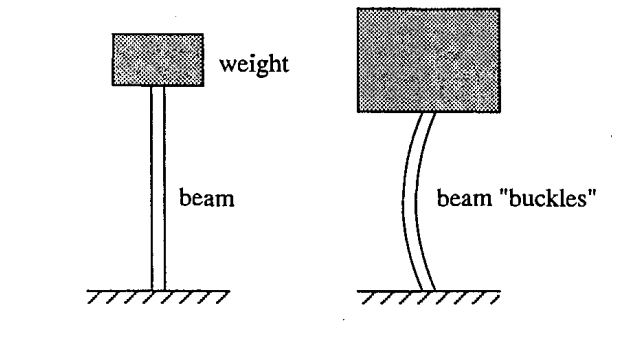

Figura 1. Viga con un peso que modifica la estabilidad de su posición 

Hay dos tipos muy diferentes de bifurcación de horquilla. El tipo más simple se llama supercrítico

## Bifurcación de horquilla supercrítica 

La forma normal de la bifurcación de horquilla supercrítica es

$$\dot{x} = rx - x^3$$

---



In [87]:
# modelo con bifurcación de horquilla supercrítica 
model <- function(times,state,parms) {
        with(as.list(c(parms,state)), {
                
                dx = r*x - x^3
                dy = -y
                return(list(c(dx,dy)))
        })
}

In [88]:
# valor de parámetros 
p <- c(r = 0.5)

In [89]:
# condiciones iniciales
s <- c(x=0.1, y = 0.2)

x y 
0 0 
Stable point, eigenvalues:  -1 -1 
x y 
0 0 
Stable point, eigenvalues:  -1 -1 
x y 
0 0 
Stable point, eigenvalues:  -1 -1 


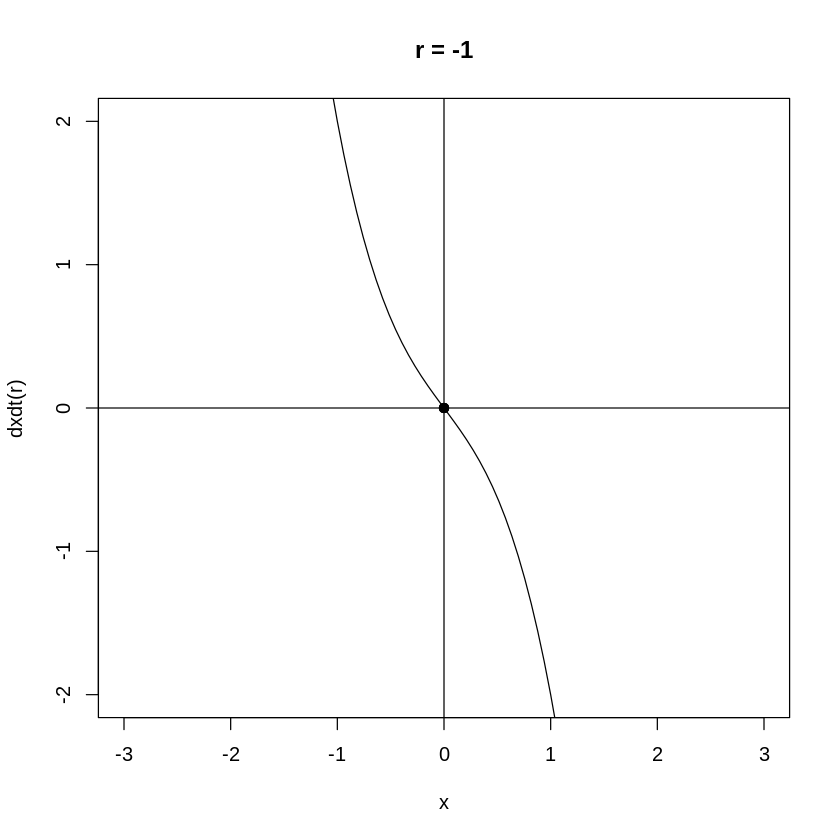

           x            y 
-0.002283648  0.000000000 
Stable point, eigenvalues:  -1.564508e-05 -1 
x y 
0 0 
Stable point, eigenvalues:  -1e-16 -1 
          x           y 
0.002283668 0.000000000 
Stable point, eigenvalues:  -1.564549e-05 -1 


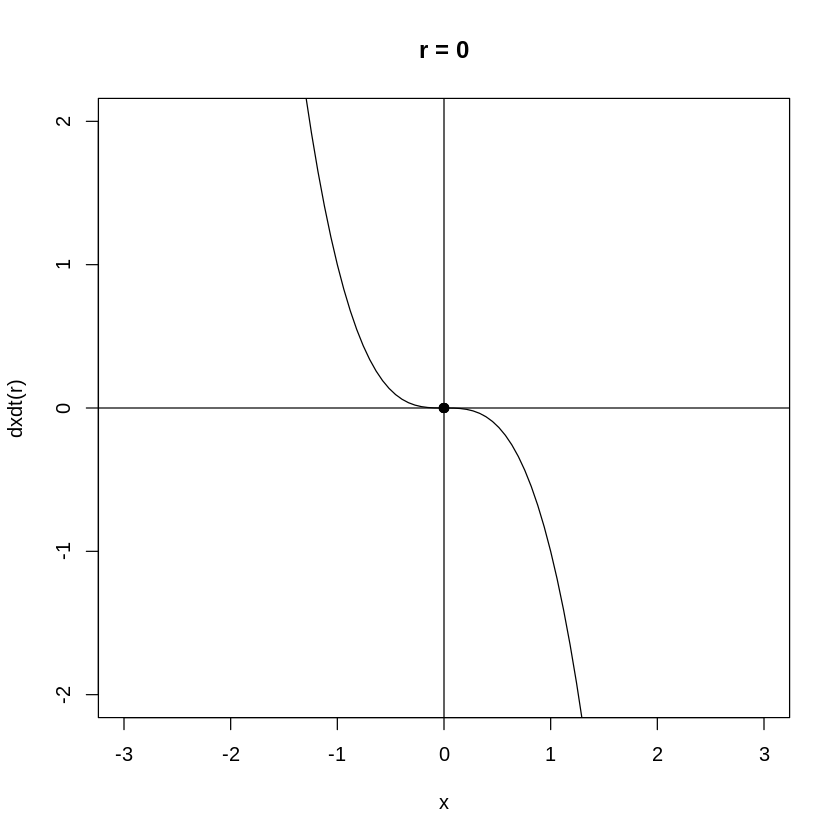

 x  y 
-1  0 
Stable point, eigenvalues:  -1 -2 
x y 
0 0 
Unstable point, eigenvalues:  1 -1 
x y 
1 0 
Stable point, eigenvalues:  -1 -2 


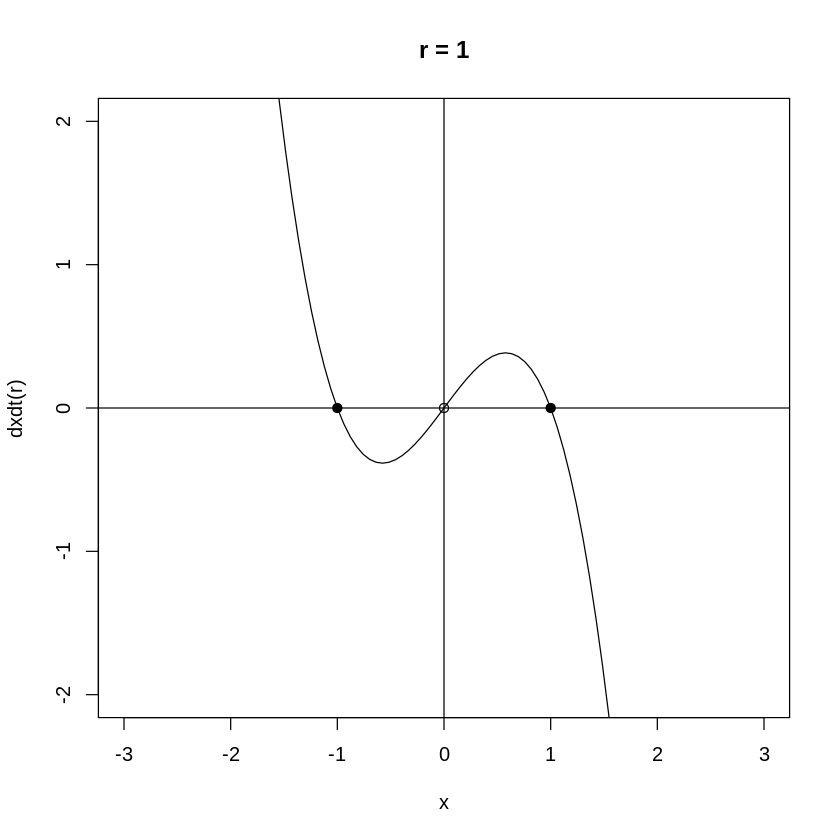

In [90]:
dxdt <- function(r) {
        
        f <- r*x - x^3
        return(f)
}

x <- seq(-3,3,len=100)

for (r in c(-1,0,1)) {
        plot(x,dxdt(r), ylim = c(-2,2), type = "l", main = paste0("r = ",r))
        abline(h = 0)
        abline(v = 0)
        p["r"] <- r
        newton(state = c(x=-1,y=0), plot = TRUE)
        newton(state = c(x=0,y=0), plot = TRUE)
        newton(state = c(x=1,y=0), plot = TRUE)
}

Cuando $r < 0$, el origen es el único punto fijo y es estable. Cuando $r = 0$, el origen sigue siendo estable, pero mucho más débilmente, ya que la linealización desaparece. Ahora las soluciones ya no decaen exponencialmente rápido, sino que el decaimiento es una función algebraica del tiempo mucho más lenta. Esta decadencia letárgica se denomina desaceleración crítica en la literatura de física. Finalmente, cuando $r> 0$, el origen se vuelve inestable. Aparecen dos nuevos puntos fijos estables a cada lado del origen, ubicados simétricamente en $x^* = \pm \sqrt r$ ;.

### Plano de fase

 x  y 
-1  0 
Stable point, eigenvalues:  -1 -2 


x  y 
-1  0

x y 
0 0 
Unstable point, eigenvalues:  1 -1 


x y 
0 0

x y 
1 0 
Stable point, eigenvalues:  -1 -2 


x y 
1 0

x             y 
 1.000000e+00 -4.302899e-34

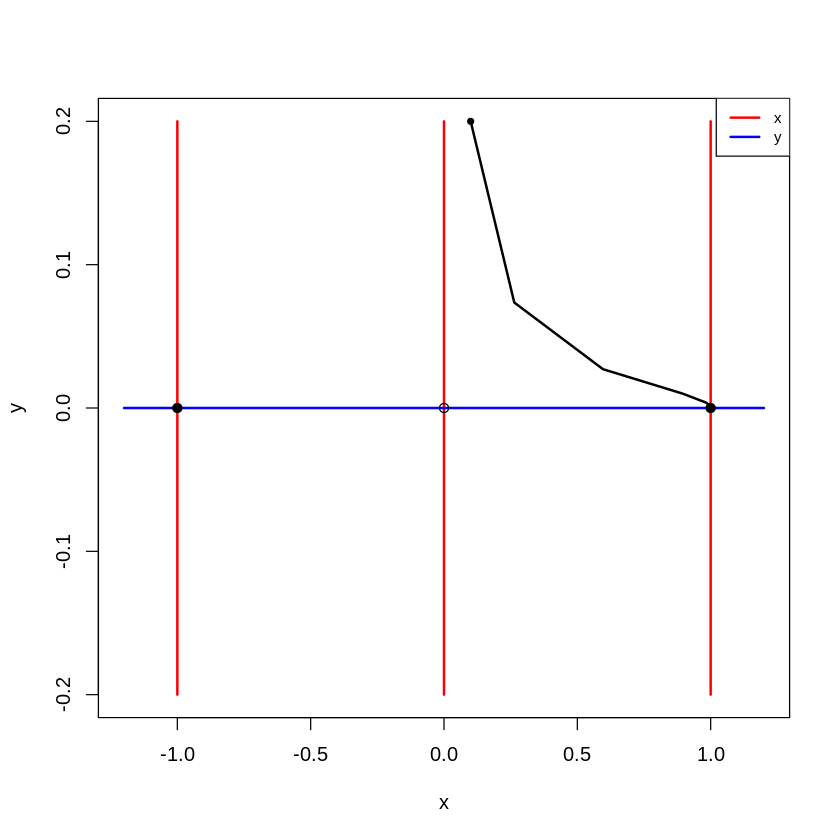

In [91]:
plane(xmin = -1.2,xmax = 1.2,ymin = -0.2, ymax = 0.2, vector = F, portrait = F)
newton(state = c(x = -1, y = 0), plot = T)
newton(state = c(x = 0, y = 0), plot = T)
newton(state = c(x = 1, y = 0), plot = T)
run(traject = T)

### Diagrama de bifurcación 

x y 
1 0 
Stable point, eigenvalues:  -1 -2 
Starting at r = -1 with:
           x            y 
7.618003e-20 0.000000e+00 
Bifurcation at r = 6.175616e-16 
x y 
1 0 
Stable point, eigenvalues:  -1 -2 
Starting at r = 1 with:
x y 
1 0 
Turning point point at r = 0.00078125 


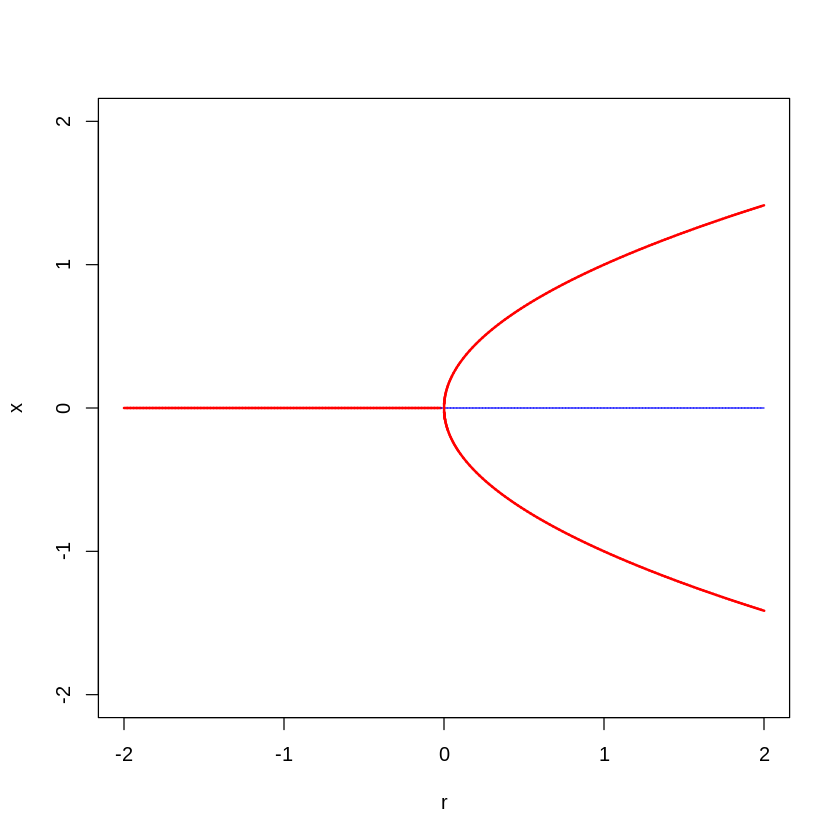

In [92]:
ss1 <- newton(state = c(x=1,y=0))
p <- c(r=-1)
continue(state = ss1,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2)

p <- c(r=1)
ss2 <- newton(state = c(x=1,y=0))
continue(state = ss2,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2,
         add = T)

La razón del término "horquilla" se aclara cuando trazamos el diagrama de bifurcación

## Bifurcación de horquilla subcrítica 

En el caso supercrítico $x = rx - x^3$ discutido anteriormente, el término cúbico estabiliza: actúa como una fuerza restauradora que empuja a $x(t)$ hacia $x = 0$. Si en cambio el término cúbico fuera desestabilizador, como en

$$ \dot{x} = rx + x^3 $$

entonces tendríamos una bifurcación de horquilla subcrítica.

In [93]:
# modelo con bifurcación de horquilla subcrítica
model <- function(times,state,parms) {
        with(as.list(c(parms,state)), {
                
                dx = r*x + x^3
                dy = -y
                return(list(c(dx,dy)))
        })
}

In [101]:
# parámetros del modelo
p <- c(r = -0.5)
p

r 
-0.5

In [95]:
# condiciones iniciales
s <- c(x = 0.1, y = 0.2)

x y 
0 0 
Stable point, eigenvalues:  -1 -1 
 x  y 
-1  0 
Unstable point, eigenvalues:  2 -1 
x y 
1 0 
Unstable point, eigenvalues:  2 -1 


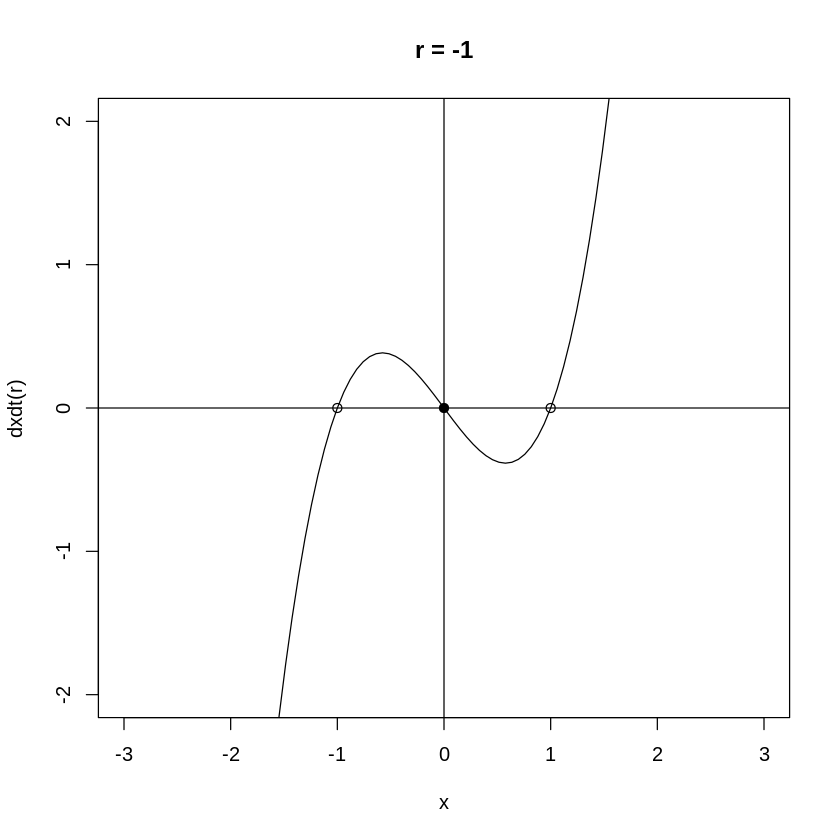

x y 
0 0 
Unstable point, eigenvalues:  1e-16 -1 
           x            y 
-0.002283648  0.000000000 
Unstable point, eigenvalues:  1.564508e-05 -1 
          x           y 
0.002283668 0.000000000 
Unstable point, eigenvalues:  1.564549e-05 -1 


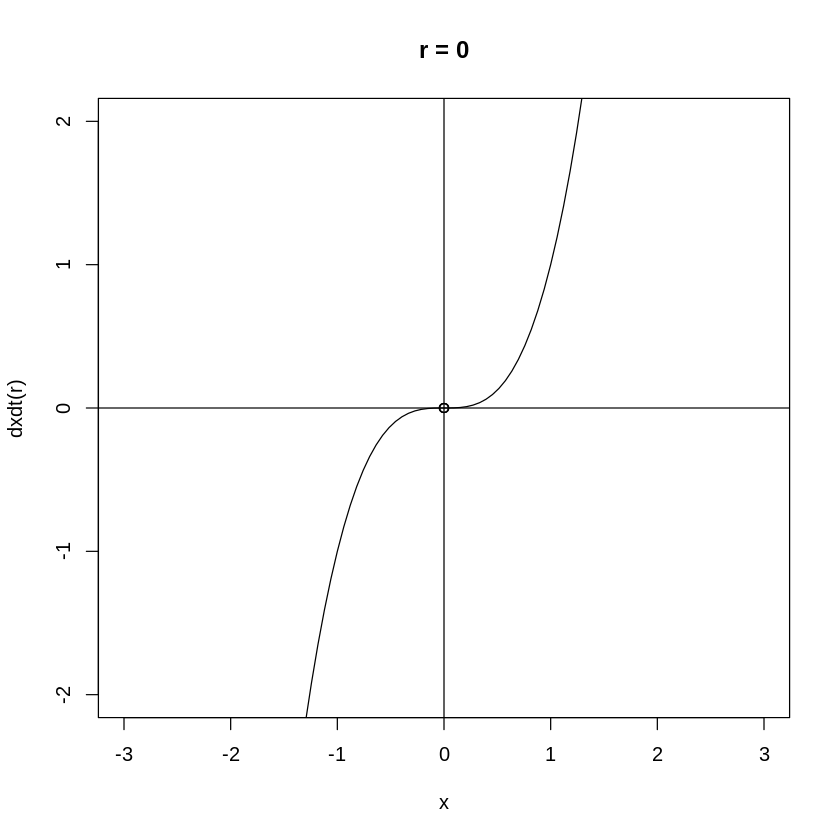

x y 
0 0 
Unstable point, eigenvalues:  1 -1 
x y 
0 0 
Unstable point, eigenvalues:  1 -1 
x y 
0 0 
Unstable point, eigenvalues:  1 -1 


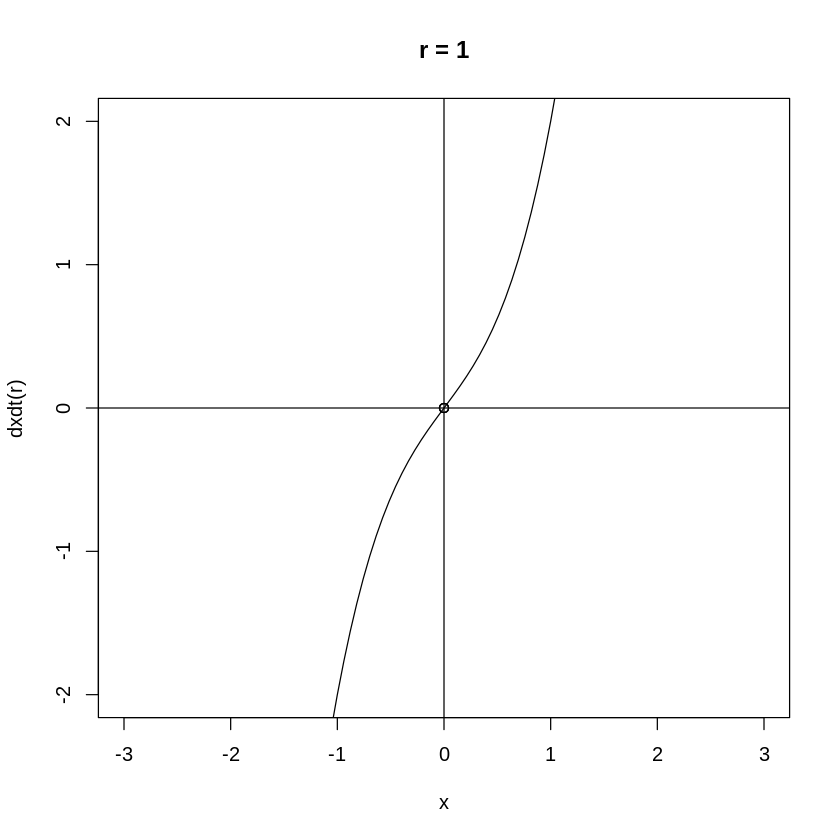

In [102]:
dxdt <- function(r) {
        
        f <- r*x + x^3
        return(f)
}

x <- seq(-3,3,len=100)

for (r in c(-1,0,1)) {
        plot(x,dxdt(r), ylim = c(-2,2), type = "l", main = paste0("r = ",r))
        abline(h = 0)
        abline(v = 0)
        p["r"] <- r
        newton(state = c(x=0,y=0), plot = TRUE)
        newton(state = c(x=-1,y=0), plot = TRUE)
        newton(state = c(x=1,y=0), plot = TRUE)
}
p <- c(r=-0.5)

Los puntos fijos distintos de cero $x^* = \pm \sqrt -r$ son inestables y existen solo debajo de la bifurcación $(r < 0)$, lo que motiva el término "subcrítico". Más importante aún, el origen es estable para $r < 0$ e inestable para $r > 0$, como en el caso supercrítico, pero ahora la inestabilidad para $r >$ 0 no se opone al término cúbico; de hecho, el término cúbico ayuda a conduciendo las trayectorias hasta el infinito! Este efecto conduce a una explosión.

### Plano de fase 

x             y 
 9.961676e-21 -2.531631e-31

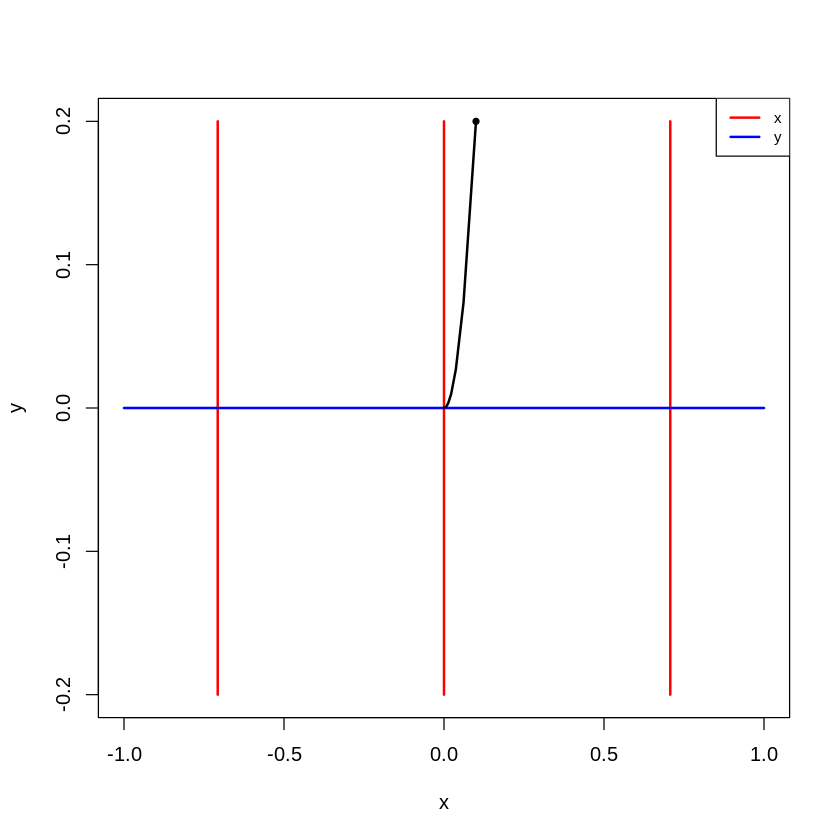

In [103]:
plane(xmin = -1,xmax = 1,ymin = -0.2, ymax = 0.2)
run(traject = T)

### Diagrama de bifurcación 

         x          y 
-0.7071071  0.0000000 
Unstable point, eigenvalues:  1.000001 -1 
Starting at r = -0.5 with:
         x          y 
-0.7071071  0.0000000 
Turning point point at r = -0.00078125 
x y 
0 0 
Unstable point, eigenvalues:  0.5 -1 
Starting at r = 0.5 with:
x y 
0 0 
Bifurcation at r = -1.734723e-16 


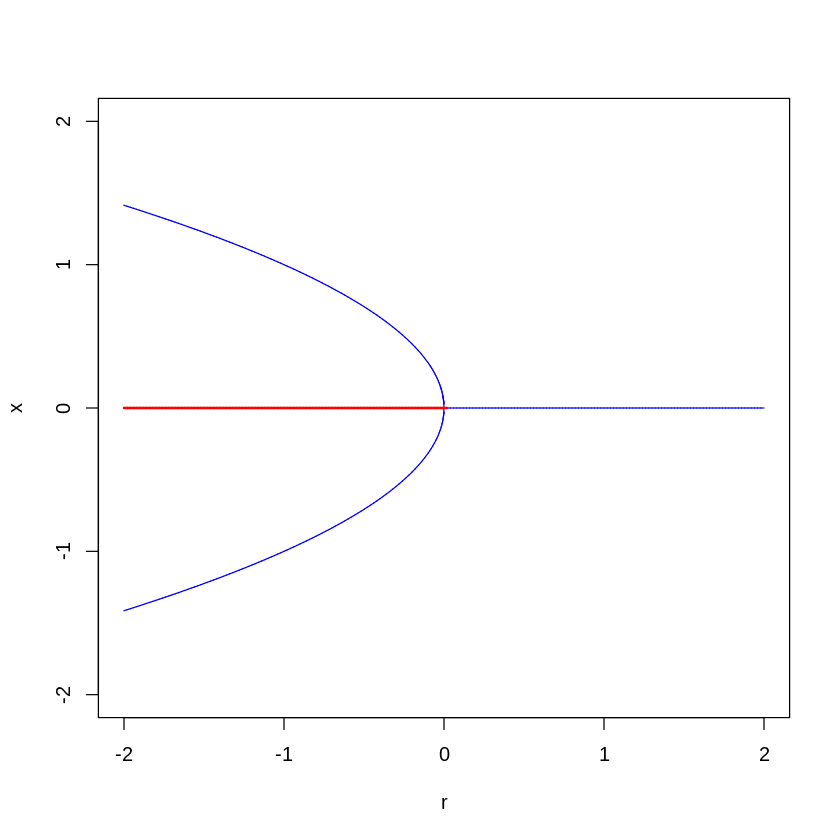

In [98]:
p <- c(r = -0.5)
ss1 <- newton(state = c(x=-1,y=0))
continue(state = ss1,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2)
p <- c(r = 0.5)
ss2 <- newton(state = c(x=1,y=0))
continue(state = ss2,
         x = "r",
         step = 0.01,
         xmin = -2,
         xmax = 2,
         y = "x",
         ymin = -2,
         ymax = 2,
         add = T)